In [ ]:
!pip install ipyleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00


In [ ]:
!pip install pystac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install pystac_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install odc-stac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Cloning the repository for leafmap

In [ ]:
!git clone https://github.com/giswqs/leafmap.git

Cloning into 'leafmap'...
remote: Enumerating objects: 9476, done.
remote: Counting objects: 100% (1707/1707), done.
remote: Compressing objects: 100% (798/798), done.
remote: Total 9476 (delta 926), reused 1678 (delta 901), pack-reused 7769
Receiving objects: 100% (9476/9476), 284.86 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (6173/6173), done.


In [ ]:
!pip install planetary-computer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!planetarycomputer configure

Please enter your API subscription key: 8037994b42c1450e9a4daca46c196464


In [ ]:
# import planetary_computer as pc
# import pystac_client

# from pystac_client import Client
# import planetary_computer, requests
# api = Client.open(
#    'https://planetarycomputer.microsoft.com/api/stac/v1',
#    modifier=planetary_computer.sign_inplace,
# )

In [ ]:
!pip install Rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m rich

## Loading the dependencies

In [ ]:
## We have to get access to planetary_computer API

In [ ]:
from odc import stac
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import ipyleaflet
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix

# Planetary Computer Tools
import pystac
import pystac_client
# import odc-stac
from pystac_client import Client
from pystac.extensions.eo import EOExtension as eo
from odc.stac import stac_load
import planetary_computer as pc
pc.settings.set_subscription_key('8037994b42c1450e9a4daca46c196464')

# Others
import requests
import rich.table

In [ ]:
from itertools import cycle
from tqdm import tqdm
tqdm.pandas()

In [ ]:
## Curated the data from a certain region of Vietnam in 2020
crop_presence_data = pd.read_csv("/content/drive/MyDrive/Crop_Location_Data_20221201.csv")
crop_presence_data.head()

,Latitude and Longitude,Class of Land
0,"(10.323727047081501, 105.2516346045924)",Rice
1,"(10.322364360592521, 105.27843410554115)",Rice
2,"(10.321455902933202, 105.25254306225168)",Rice
3,"(10.324181275911162, 105.25118037576274)",Rice
4,"(10.324635504740822, 105.27389181724476)",Rice


Sentinel-1 radar data penetrates through the clouds, thus helping us to get the band values with minimal atmospheric attenuation. Band values such as VV and VH help us in distinguishing between the rice and non rice crops. Hence we are choosing VV and VH as predictor variables for this experiment.

VV - gamma naught values of signal transmitted with vertical polarization and received with vertical polarization with radiometric terrain correction applied.

VH - gamma naught values of signal transmitted with vertical polarization and received with horizontal polarization with radiometric terrain correction applied.

In [ ]:
# !pip install odc
import odc

In [ ]:
def get_sentinel_data(latlong,time_slice,assets):
    '''
    Returns VV and VH values for a given latitude and longitude
    Attributes:
    latlong - A tuple with 2 elements - latitude and longitude
    time_slice - Timeframe for which the VV and VH values have to be extracted
    assets - A list of bands to be extracted
    '''
    #latlong = (10.013942985253381, 105.67361318732796)
    latlong=latlong.replace('(','').replace(')','').replace(' ','').split(',')
    for i in range(2):
      latlong[i] = float(latlong[i])


    #bbox_of_interest = (float(latlong[1]) , float(latlong[0]), float(latlong[1]) , float(latlong[0]))
    time_of_interest = time_slice
    box_size_deg = 0.0004 # Surrounding box in degrees, yields approximately 5x5 pixel region

    min_lon = latlong[1]-box_size_deg/2
    min_lat = latlong[0]-box_size_deg/2
    max_lon = latlong[1]+box_size_deg/2
    max_lat = latlong[0]+box_size_deg/2

    bbox_of_interest = (min_lon, min_lat, max_lon, max_lat)
    ###

    catalog = pystac_client.Client.open(
        "https://planetarycomputer.microsoft.com/api/stac/v1"
    )
    search = catalog.search(
        collections=["sentinel-1-rtc"], bbox=bbox_of_interest, datetime=time_of_interest
    )
    items = list(search.get_all_items())
    bands_of_interest = assests
    resolution = 10  # meters per pixel
    scale = resolution / 111320.0
    data = stac_load([items[0]], bands = bands_of_interest, patch_url=pc.sign,crs="EPSG:4326",resolution=scale,bbox=bbox_of_interest)
    vh = data["vh"].astype("float").values.tolist()[0][0]
    vv = data["vv"].astype("float").values.tolist()[0][0]

    mean = data.mean(dim=['latitude','longitude']).compute()
    dop = (mean.vv / (mean.vv + mean.vh))
    m = 1 - dop
    rvi = (np.sqrt(dop))*((4*mean.vh)/(mean.vv + mean.vh))
    return vh[0],vv[0]

In [ ]:
# xx = odc.stac.load(...crs="EPSG:3857",resolution=10)
# yy = odc.stac.load(...crs="EPSG:4326",resolution=0.00009009)

In [ ]:
## Sentinel-radiometric data
# catalog = pystac_client.Client.open(
#     "https://planetarycomputer.microsoft.com/api/stac/v1",
#     modifier=pc.sign_inplace,
# )

In [ ]:
# ## Just searching for assets over Panama in order to
# bbox = [-80.11, 8.71, -79.24, 9.38]
# search = catalog.search(
#     collections=["sentinel-1-rtc"], bbox=bbox, datetime="2022-05-02/2022-05-09"
# )
# items = search.item_collection()
# print(f"Found {len(items)} items")
# item = items[0]

Found 3 items


In [ ]:
# Image(url=item.assets["rendered_preview"].href)

In [ ]:
# table = rich.table.Table("key", "value")
# for k, v in sorted(item.properties.items()):
#     table.add_row(k, str(v))

# table

In [ ]:
# time_slice = "2020-03-20/2020-03-21"
time_slice = '2020-03-20/2021-03-21'
assests = ['vh','vv']
vh_vv = []
for coordinates in tqdm(crop_presence_data['Latitude and Longitude']):
    vh_vv.append(get_sentinel_data(coordinates,time_slice,assests))
vh_vv_data = pd.DataFrame(vh_vv,columns =['vh','vv'])

100%|██████████| 600/600 [08:14<00:00,  1.21it/s]


In [ ]:
# latlong = '(10.323727047081501, 105.2516346045924)'
# latlong=latlong.replace('(','').replace(')','').replace(' ','').split(',')
# bbox_of_interest = [float(latlong[1]) , float(latlong[0]), float(latlong[1])+100.00 , float(latlong[0])]
# bbox_of_interest

In [ ]:
def combine_two_datasets(dataset1,dataset2):
    '''
    Returns a  vertically concatenated dataset.
    Attributes:
    dataset1 - Dataset 1 to be combined
    dataset2 - Dataset 2 to be combined
    '''
    data = pd.concat([dataset1,dataset2], axis=1)
    return data

In [ ]:
crop_data = combine_two_datasets(crop_presence_data,vh_vv_data)
crop_data.head()

,Latitude and Longitude,Class of Land,vh,vv
0,"(10.323727047081501, 105.2516346045924)",Rice,0.028296,0.112560
1,"(10.322364360592521, 105.27843410554115)",Rice,0.051894,0.048721
2,"(10.321455902933202, 105.25254306225168)",Rice,0.033304,0.081855
3,"(10.324181275911162, 105.25118037576274)",Rice,0.010928,0.024132
4,"(10.324635504740822, 105.27389181724476)",Rice,0.012968,0.015349


In [ ]:
crop_data.shape

(600, 4)

In [ ]:
### Radar Vegetation Index (RVI)
#mean = d.mean(dim=['latitude','longitude']).compute()

In [ ]:
# crop_data.to_csv('/content/drive/MyDrive/crop_data.csv')

## Model Building

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
crop_data = crop_data[['vh','vv','Class of Land']]

X = crop_data.drop(columns=['Class of Land']).values
y = crop_data ['Class of Land'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=40)

# poly = PolynomialFeatures(degree = 3, interaction_only=True)
# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# ## Explore MINMAX Scaler
# ## Max Absolute Scaling
# ## Robust Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



## Training

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [ ]:
insample_predictions = model.predict(X_train)
print("Insample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions,y_train)))
print(classification_report(insample_predictions,y_train))

Insample Accuracy 81.43%
              precision    recall  f1-score   support

    Non Rice       0.84      0.80      0.82       222
        Rice       0.79      0.83      0.81       198

    accuracy                           0.81       420
   macro avg       0.81      0.82      0.81       420
weighted avg       0.82      0.81      0.81       420



In [ ]:
#  ## Trying out Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# y_pred = gnb.fit(X_train, y_train).predict(X_test)
# print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
# accuracy = (X_test.shape[0] - (y_test != y_pred).sum())/X_test.shape[0]
# print("Insample Accuracy {0:.2f}%".format(100*accuracy))
# # print(classification_report(insample_predictions,y_train))

In [ ]:
def plot_confusion_matrix(true_value,predicted_value,title,labels):
    '''
    Plots a confusion matrix.
    Attributes:
    true_value - The ground truth value for comparision.
    predicted_value - The values predicted by the model.
    title - Title of the plot.
    labels - The x and y labels of the plot.
    '''
    cm = confusion_matrix(true_value,predicted_value)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(title);
    ax.xaxis.set_ticklabels(labels);
    ax.yaxis.set_ticklabels(labels);

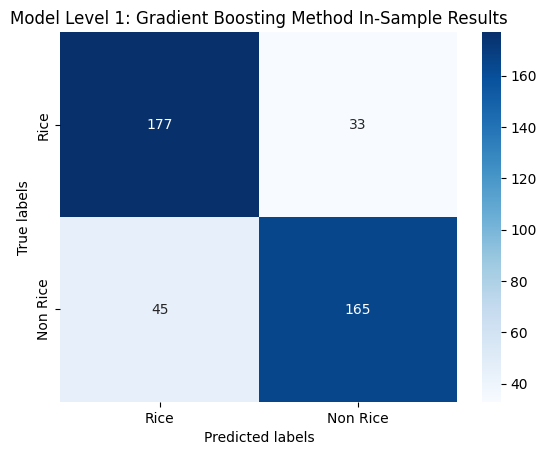

In [ ]:
plot_confusion_matrix(y_train,insample_predictions,"Model Level 1: Gradient Boosting Method In-Sample Results",['Rice', 'Non Rice'])

## Outsample Evaluation

In [ ]:
outsample_predictions = model.predict(X_test)
print("Accuracy {0:.2f}%".format(100*accuracy_score(outsample_predictions, y_test)))
print(classification_report(y_test, outsample_predictions))

Accuracy 88.89%
              precision    recall  f1-score   support

    Non Rice       0.88      0.90      0.89        90
        Rice       0.90      0.88      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



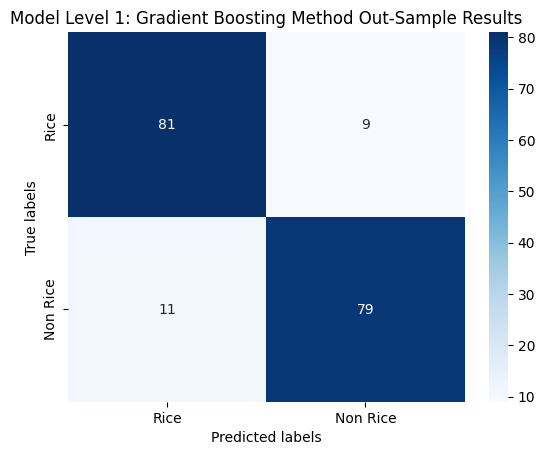

In [ ]:
plot_confusion_matrix(y_test, outsample_predictions,"Model Level 1: Gradient Boosting Method Out-Sample Results",['Rice', 'Non Rice'])

In [ ]:
test_file = pd.read_csv('/content/drive/MyDrive/challenge_1_submission_template.csv')
test_file.head()

,Latitude and Longitude
0,"(10.18019073690894, 105.32022315786804)"
1,"(10.561107033461816, 105.12772097986661)"
2,"(10.623790611954897, 105.13771401411867)"
3,"(10.583364246115156, 105.23946127195805)"
4,"(10.20744446668854, 105.26844107128906)"


In [ ]:
from sklearn.utils import all_estimators
def getClassifiers(classifier):
    classifierModels = []
    for name, ClassifierClass in all_estimators(type_filter=classifier):
        try:
            classifier = ClassifierClass()
            classifierModels.append((name, classifier))
        except Exception as e:
            pass
    return classifierModels

classifierModels = getClassifiers('classifier')
print(len(classifierModels))
model1 = classifierModels[: 10]
model2 = classifierModels[10: 20]
model3 = classifierModels[20: 30]
model4 = classifierModels[30: 34]

34


## SELECTING DIFFERENT MODELS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score

def evaluate(model, XTrain, yTrain, XTest, yTest):
    model.fit(XTrain, yTrain)
    yPred = model.predict(XTest)
    accuracy = accuracy_score(yTest, yPred)
    # f1 = f1_score(yTest, yPred)
    print(f'Model Name = {type(model).__name__}, accuracy score = {accuracy}')
    print(classification_report(y_test, yPred))

In [ ]:
def tryModels(models):
    for model in models:
        try:
            print(f'Running {type(model[1]).__name__}')
            ans = evaluate(model[1], X_train, y_train, X_test, y_test)
            # print(classification_report(y_test, outsample_predictions))
            print(ans)
        except Exception as e:
            pass

In [ ]:
tryModels(model1)

Running AdaBoostClassifier
Model Name = AdaBoostClassifier, accuracy score = 0.8166666666666667
              precision    recall  f1-score   support

    Non Rice       0.80      0.84      0.82        90
        Rice       0.84      0.79      0.81        90

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

None
Running BaggingClassifier
Model Name = BaggingClassifier, accuracy score = 0.8444444444444444
              precision    recall  f1-score   support

    Non Rice       0.82      0.89      0.85        90
        Rice       0.88      0.80      0.84        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180

None
Running BernoulliNB
Model Name = BernoulliNB, accuracy score = 0.6722222222222223
              precision    recall  f1-score   support

    Non R

In [ ]:
tryModels(model2)

Running GaussianNB
Model Name = GaussianNB, accuracy score = 0.5
              precision    recall  f1-score   support

    Non Rice       0.00      0.00      0.00        90
        Rice       0.50      1.00      0.67        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180

None
Running GaussianProcessClassifier
Model Name = GaussianProcessClassifier, accuracy score = 0.9
              precision    recall  f1-score   support

    Non Rice       0.91      0.89      0.90        90
        Rice       0.89      0.91      0.90        90

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

None
Running GradientBoostingClassifier
Model Name = GradientBoostingClassifier, accuracy score = 0.85
              precision    recall  f1-score   support

    Non Rice       0.84

In [ ]:
tryModels(model3)

Running LogisticRegressionCV
Model Name = LogisticRegressionCV, accuracy score = 0.6111111111111112
              precision    recall  f1-score   support

    Non Rice       0.65      0.49      0.56        90
        Rice       0.59      0.73      0.65        90

    accuracy                           0.61       180
   macro avg       0.62      0.61      0.61       180
weighted avg       0.62      0.61      0.61       180

None
Running MLPClassifier
Model Name = MLPClassifier, accuracy score = 0.7277777777777777
              precision    recall  f1-score   support

    Non Rice       0.90      0.51      0.65        90
        Rice       0.66      0.94      0.78        90

    accuracy                           0.73       180
   macro avg       0.78      0.73      0.71       180
weighted avg       0.78      0.73      0.71       180

None
Running MultinomialNB
Running NearestCentroid
Model Name = NearestCentroid, accuracy score = 0.5
              precision    recall  f1-score   support

In [ ]:
tryModels(model4)

Running RidgeClassifier
Model Name = RidgeClassifier, accuracy score = 0.6111111111111112
              precision    recall  f1-score   support

    Non Rice       0.65      0.49      0.56        90
        Rice       0.59      0.73      0.65        90

    accuracy                           0.61       180
   macro avg       0.62      0.61      0.61       180
weighted avg       0.62      0.61      0.61       180

None
Running RidgeClassifierCV
Model Name = RidgeClassifierCV, accuracy score = 0.6111111111111112
              precision    recall  f1-score   support

    Non Rice       0.65      0.49      0.56        90
        Rice       0.59      0.73      0.65        90

    accuracy                           0.61       180
   macro avg       0.62      0.61      0.61       180
weighted avg       0.62      0.61      0.61       180

None
Running SGDClassifier
Model Name = SGDClassifier, accuracy score = 0.34444444444444444
              precision    recall  f1-score   support

    Non Ri

In [ ]:
from sklearn.semi_supervised import LabelPropagation
model0 = LabelPropagation(kernel='knn', n_neighbors=7, max_iter=1000)
model0.fit(X_train,y_train)

LabelPropagation(kernel='knn')

In [ ]:
#Grid Search method for Hyperparameter tuning
# from sklearn.model_selection import GridSearchCV
# lp = LabelPropagation(kernel='knn',max_iter=1000)
# params = {
#     'n_neighbors' : [3,5,7,9]
# }
# grid = GridSearchCV(lp,params,cv=5,scoring='accuracy')
# grid.fit(X_train, y_train)
# model = grid.best_estimator_
# predicted_labels1 = model.predict(X_test)
# print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels1,y_test)))
# print(classification_report(predicted_labels1,y_test))
# grid.best_params_


Outsample Accuracy 87.78%
              precision    recall  f1-score   support

    Non Rice       0.91      0.85      0.88        96
        Rice       0.84      0.90      0.87        84

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



{'n_neighbors': 5}

In [ ]:
insample_predictions0 = model0.predict(X_test)
print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(insample_predictions0,y_test)))
print(classification_report(insample_predictions0,y_test))

Outsample Accuracy 88.33%
              precision    recall  f1-score   support

    Non Rice       0.92      0.86      0.89        97
        Rice       0.84      0.92      0.88        83

    accuracy                           0.88       180
   macro avg       0.88      0.89      0.88       180
weighted avg       0.89      0.88      0.88       180



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
params = {
    'n_estimators' : [100,150,200,250],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [1,2,3,4,5,6,7]
}
grid = GridSearchCV(rf,params,scoring='accuracy',cv=3)
grid.fit(X_train,y_train)
rf_model = grid.best_estimator_
predicted_labels2 = rf_model.predict(X_test)
print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels2,y_test)))
print(classification_report(predicted_labels2,y_test))
grid.best_params_

Outsample Accuracy 86.67%
              precision    recall  f1-score   support

    Non Rice       0.89      0.85      0.87        94
        Rice       0.84      0.88      0.86        86

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
# knn_model.fit(X_train, y_train)
# predicted_labels3 = knn_model.predict(X_test)
# print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels3,y_test)))
# print(classification_report(predicted_labels3,y_test))

In [ ]:
params = {
    'n_neighbors' : [5,6,7],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute'],
    'p' : [1,2]
}
grid = GridSearchCV(knn_model,params,cv=3,scoring='accuracy')
grid.fit(X_train, y_train)
model = grid.best_estimator_
predicted_labels3 = model.predict(X_test)
print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels3,y_test)))
print(classification_report(predicted_labels3,y_test))
grid.best_params_

Outsample Accuracy 87.78%
              precision    recall  f1-score   support

    Non Rice       0.91      0.85      0.88        96
        Rice       0.84      0.90      0.87        84

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

## BEST MODEL - HYPERPARAMETER TUNING

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
gpc = GaussianProcessClassifier()
# param_grid = {
#     'kernel' : [1*RBF(), 1*DotProduct(), 1*Matern(), 1*RationalQuadratic(), 1*WhiteKernel()]
# }
# grid = GridSearchCV(gpc, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
param_grid = {
    'max_iter_predict' : [100,150,200],
    'n_restarts_optimizer' : [1,2],
    'multi_class' : ['one_vs_rest', 'one_vs_one']
}
grid = GridSearchCV(gpc, param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_
predicted_labels4 = model.predict(X_test)
print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels4,y_test)))
print(classification_report(predicted_labels4,y_test))
# model = grid.best_estimator_
# predicted_labels = model.predict(X_test)
# print("Outsample Accuracy {0:.2f}%".format(100*accuracy_score(predicted_labels,y_test)))
# print(classification_report(predicted_labels,y_test))
# print('Best Mean Accuracy: %.3f' % grid.best_score_)
grid.best_params_

Outsample Accuracy 90.00%
              precision    recall  f1-score   support

    Non Rice       0.89      0.91      0.90        88
        Rice       0.91      0.89      0.90        92

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



{'max_iter_predict': 100,
 'multi_class': 'one_vs_rest',
 'n_restarts_optimizer': 1}